In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import cv2
import os
from tqdm import tqdm

In [ ]:
import kagglehub

# this is the dataset link , to downloa it 
path = kagglehub.dataset_download("hereisburak/pins-face-recognition")

print("Path to dataset files:", path)

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 372M/372M [02:43<00:00, 2.39MB/s] 

Extracting files...


Path to dataset files: C:\Users\parth\.cache\kagglehub\datasets\hereisburak\pins-face-recognition\versions\1


In [ ]:
import os

# I have declared the data set path here 
dataset_path = 'data/pins'

# It will display all the directories
directories = os.listdir(dataset_path)

#  For better working with the dataset , I have changed the file name starting with pins_ to only the name
for dir_name in directories:
    if dir_name.startswith('pins_'):
        old_path = os.path.join(dataset_path, dir_name)
        new_name = dir_name.replace('pins_', '')
        new_path = os.path.join(dataset_path, new_name)
        
        try:
            os.rename(old_path, new_path)
            print(f"Successfully renamed: {dir_name} -> {new_name}")
        except Exception as e:
            print(f"Error renaming {dir_name}: {str(e)}")

print("Directory renaming completed!")

Successfully renamed: pins_Adriana Lima -> Adriana Lima
Successfully renamed: pins_Alex Lawther -> Alex Lawther
Successfully renamed: pins_Alexandra Daddario -> Alexandra Daddario
Successfully renamed: pins_Alvaro Morte -> Alvaro Morte
Successfully renamed: pins_alycia dabnem carey -> alycia dabnem carey
Successfully renamed: pins_Amanda Crew -> Amanda Crew
Successfully renamed: pins_amber heard -> amber heard
Successfully renamed: pins_Andy Samberg -> Andy Samberg
Successfully renamed: pins_Anne Hathaway -> Anne Hathaway
Successfully renamed: pins_Anthony Mackie -> Anthony Mackie
Successfully renamed: pins_Avril Lavigne -> Avril Lavigne
Successfully renamed: pins_barack obama -> barack obama
Successfully renamed: pins_barbara palvin -> barbara palvin
Successfully renamed: pins_Ben Affleck -> Ben Affleck
Successfully renamed: pins_Bill Gates -> Bill Gates
Successfully renamed: pins_Bobby Morley -> Bobby Morley
Successfully renamed: pins_Brenton Thwaites -> Brenton Thwaites
Successfully

In [ ]:
import os

def verify_dataset():
    dataset_path = "data/pins"
    
    # It will check whether the directory exists or not 
    if not os.path.exists(dataset_path):
        print("Dataset directory not found!")
        return False
    
    # No. of people and tot no. of images found in dataset
    num_people = len(os.listdir(dataset_path))
    total_images = sum(len(os.listdir(os.path.join(dataset_path, person))) 
                      for person in os.listdir(dataset_path))
    
    print(f"Found {num_people} people")
    print(f"Total images: {total_images}")
    
    return True

verify_dataset()

Found 105 people
Total images: 17534


True

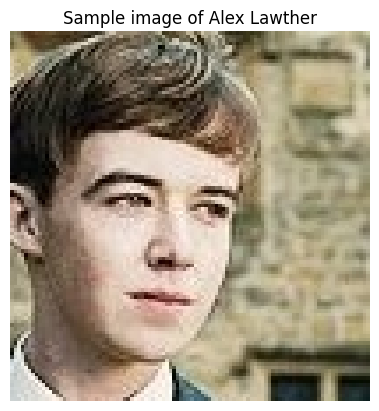

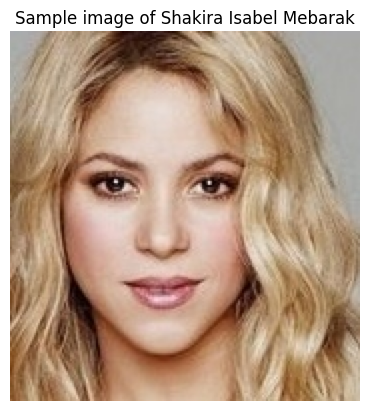

In [ ]:
import matplotlib.pyplot as plt
#  It will just provide me any 2 random face for just verification of dataset , just to show clarity 
data_dir = "data/pins"

def check_random_image():
    person = np.random.choice(os.listdir(data_dir))
    person_dir = os.path.join(data_dir, person)
    image_name = np.random.choice(os.listdir(person_dir))
    image_path = os.path.join(person_dir, image_name)
    
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f"Sample image of {person}")
    plt.axis('off')
    plt.show()

check_random_image()
check_random_image()

In [ ]:
# random seed 42 is set to everytime generate random numbers , and 42 is known for good reproducibility
# tf.random.set_seed(42)
# np.random.seed(42)

def load_lfw_dataset(data_dir, img_size=(224, 224), save_dir="data/pins_npy"):
    label_dict = {}
    
    # It will help to Check if the preprocessed NumPy arrays already exist
    X_file = os.path.join(save_dir, "images.npy")
    y_file = os.path.join(save_dir, "labels.npy")
    
    if os.path.exists(X_file) and os.path.exists(y_file): # if already the dataset is stored in numpy arrays
        print("Loading preprocessed data from NumPy files...")
        images = np.load(X_file)
        labels = np.load(y_file)
    else:
        print("Processing images and saving to NumPy arrays...")
        images = []
        labels = []
        current_label = 0
        
        
        os.makedirs(save_dir, exist_ok=True)
        
        
        for person_name in tqdm(os.listdir(data_dir)):
            person_dir = os.path.join(data_dir, person_name)
            if os.path.isdir(person_dir):
                # Only include people with at least 10 images , some directories were having less than 10 image to exclude them
                if len(os.listdir(person_dir)) >= 10:
                    label_dict[current_label] = person_name
                    for img_name in os.listdir(person_dir):
                        img_path = os.path.join(person_dir, img_name)
                        # Read and preprocess image
                        img = cv2.imread(img_path)
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        img = cv2.resize(img, img_size)
                        img = img / 255.0  # It will help to Normalize the image
                        
                        images.append(img)
                        labels.append(current_label)
                    current_label += 1
            if current_label>30:
                print("Exiting....")
                break
        
        # Convert lists to numpy arrays
        images = np.array(images)
        print(len(images))
        labels = np.array(labels)
        print(len(labels))
        
        # Save images and labels as numpy arrays for future use
        np.save(X_file, images)
        np.save(y_file, labels)

    # Return images, labels, and label dictionary (now always initialized)
    return images, labels, label_dict

# Load dataset
data_dir = "data/pins"
images, labels, label_dict = load_lfw_dataset(data_dir)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)


Processing images and saving to NumPy arrays...


 29%|██▊       | 30/105 [00:06<00:16,  4.48it/s]

Exiting....


5066
5066


In [ ]:
def create_residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=True):
    # it will help to store the input residual which is used to add as a skip connection
    shortcut = x

    # First convolution layer
    x = layers.Conv2D(filters, kernel_size, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second convolution layer
    x = layers.Conv2D(filters, kernel_size, padding="same")(x)
    x = layers.BatchNormalization()(x)

    # If input and output dimensions don't match, we have to  adjust using  shortcut and make the features similar
    if shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Add residual connection
    x = layers.Add()([shortcut, x])
    x = layers.ReLU()(x)

    return x


def create_resnet50(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Initial Processing
    x = layers.Conv2D(32, 7, strides=2, padding="same")(inputs) # larger kernel and stride of 2 is used to keep the image size same after downsampling
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x) # it is used to downsample the features map using max pooling


    # First block with 32 filters or features
    x = create_residual_block(x, filters=32)
    x = layers.MaxPooling2D(2)(x) # maxpooling of 2 means it will reduce the size to /2- if img size s 256x256 - reduce to 128x128

    # Second block by increasing the filters- doubling
    x = create_residual_block(x, filters=64)
    x = layers.MaxPooling2D(2)(x)

    # Third block by doubling the filters 
    x = create_residual_block(x, filters=128)
    x = layers.MaxPooling2D(2)(x)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x) # it will provide the array by averaging 
    features = layers.Dense(256, activation="relu")(x) # it will provide me a 1d array of 256 elements - it will multiply the features we got with input values

    return models.Model(inputs, features)

In [ ]:
class TrainingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}")
        print(f"Train Loss: {logs['loss']:.4f}")
        print(f"Train Accuracy: {logs['accuracy']:.4f}")
        print(f"Validation Loss: {logs['val_loss']:.4f}")
        print(f"Validation Accuracy: {logs['val_accuracy']:.4f}")

# Create and compile model
input_shape = (224, 224, 3)
num_classes = len(np.unique(labels))
resnet_model = create_resnet50(input_shape, num_classes)

resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # it will help to optimize dynamically  , Adam - Adaptime motion estimator optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # I have used this for loss function for getting multiple class function
    metrics=['accuracy']
)

In [ ]:
# Train the model using subset of array 
history = resnet_model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=80,
    validation_data=(X_val, y_val),
    callbacks=[TrainingCallback()]
)

# resnet_model.save("resnet50_trained_model.h5")  # Save the model to a file


# Extract features
train_features = resnet_model.predict(X_train)
val_features = resnet_model.predict(X_val)
test_features = resnet_model.predict(X_test)

Epoch 1/80
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.0958 - loss: 4.5772
Epoch 1
Train Loss: 4.4882
Train Accuracy: 0.1080
Validation Loss: 4.9254
Validation Accuracy: 0.0382
102/102 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - accuracy: 0.0959 - loss: 4.5764 - val_accuracy: 0.0382 - val_loss: 4.9254
Epoch 2/80
101/102 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.1504 - loss: 4.3124
Epoch 2
Train Loss: 4.2639
Train Accuracy: 0.1558
Validation Loss: 4.7441
Validation Accuracy: 0.0580
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.1505 - loss: 4.3114 - val_accuracy: 0.0580 - val_loss: 4.7441
Epoch 3/80
101/102 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.1827 - loss: 4.1814
Epoch 3
Train Loss: 4.1142
Train Accuracy: 0.2015
Validation Loss: 4.6509
Validation Accuracy: 0.0715
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.1831 - loss: 4.1801 - val_accuracy: 0.0715 - val_loss: 4.6509
Epoch 4/80
101/102 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.22

In [8]:
# Train Decision Tree
dt_classifier = DecisionTreeClassifier(max_depth=20, random_state=42)
dt_classifier.fit(train_features, y_train)

# Evaluate
val_pred = dt_classifier.predict(val_features)
test_pred = dt_classifier.predict(test_features)

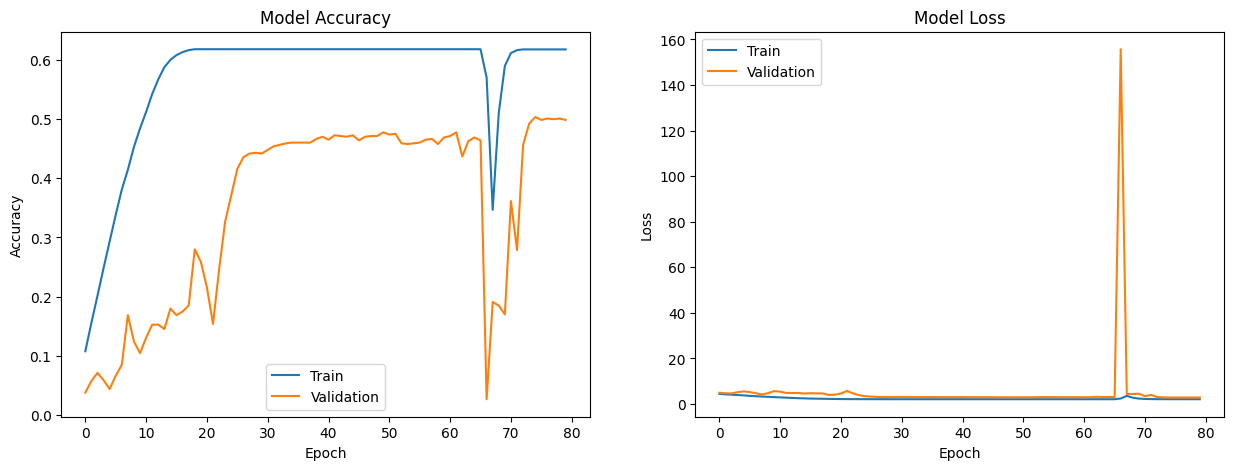

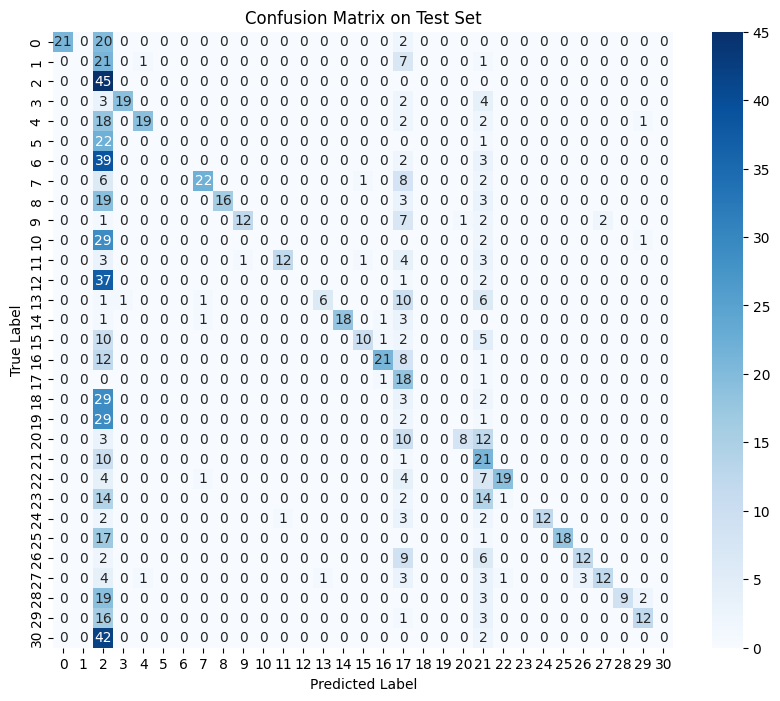


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        43
           1       0.00      0.00      0.00        30
           2       0.09      1.00      0.17        45
           3       0.95      0.68      0.79        28
           4       0.90      0.45      0.60        42
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        44
           7       0.88      0.56      0.69        39
           8       1.00      0.39      0.56        41
           9       0.92      0.48      0.63        25
          10       0.00      0.00      0.00        32
          11       0.92      0.50      0.65        24
          12       0.00      0.00      0.00        40
          13       0.86      0.24      0.38        25
          14       1.00      0.75      0.86        24
          15       0.83      0.36      0.50        28
          16       0.88      0.50      0.64        42
   

c:\Users\arora\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arora\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arora\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [9]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'])
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'])
    
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot results
plot_training_history(history)
plot_confusion_matrix(y_test, test_pred, 'Confusion Matrix on Test Set')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

In [10]:
# Save ResNet model
resnet_model.save('face_recognition_resnet.h5')

# Save Decision Tree model
import joblib
joblib.dump(dt_classifier, 'face_recognition_dt.joblib')

['face_recognition_dt.joblib']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


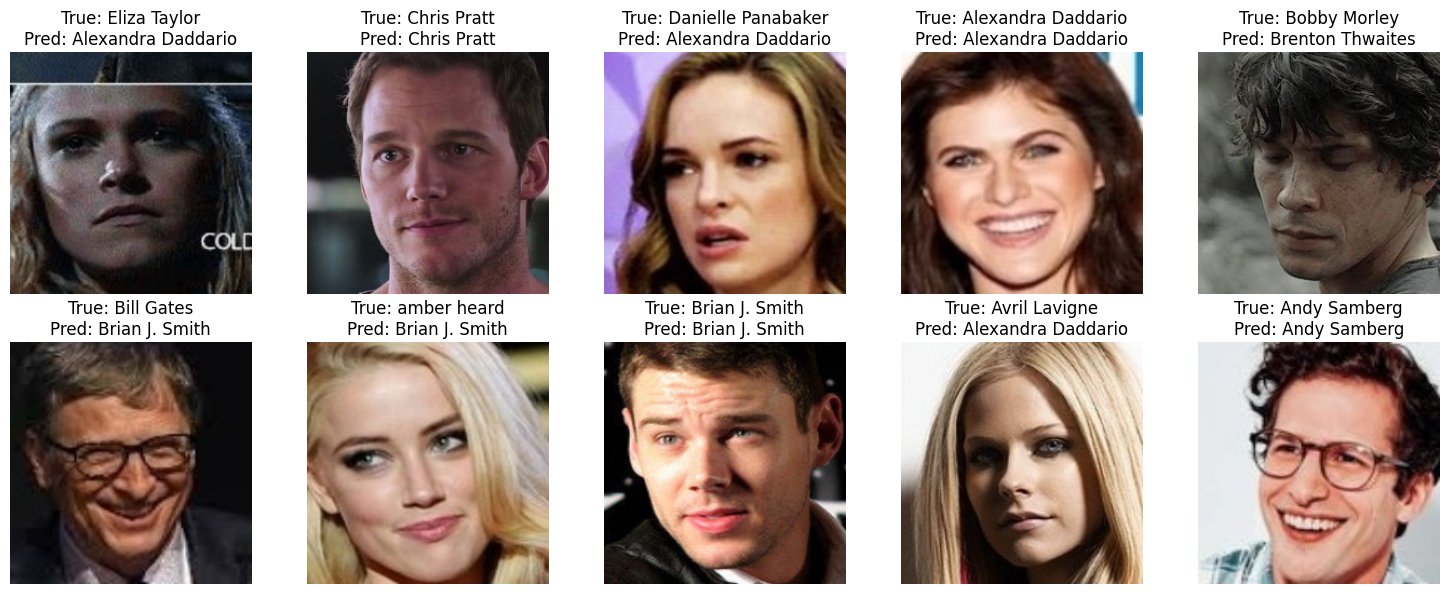

In [11]:
def predict_random_faces(num_samples=10):
    # Randomly select test images
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    test_images = X_test[indices]
    true_labels = y_test[indices]
    
    # Extract features and predict
    features = resnet_model.predict(test_images)
    predictions = dt_classifier.predict(features)
    
    # Display results
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()
    
    for idx, (img, true_label, pred_label) in enumerate(zip(test_images, true_labels, predictions)):
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f'True: {label_dict[true_label]}\nPred: {label_dict[pred_label]}')
    
    plt.tight_layout()
    plt.show()

# Test random faces
predict_random_faces()

In [ ]:
resnet_model_loaded = tf.keras.models.load_model('face_recognition_resnet.h5')
dt_classifier_loaded = joblib.load('face_recognition_dt.joblib')

def predict_face(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img_batch = np.expand_dims(img, axis=0)
    features = resnet_model_loaded.predict(img_batch)

    prediction = dt_classifier_loaded.predict(features)[0]
    

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {label_dict[prediction]}', fontsize=12)
    plt.show()


predict_face('Test Data\\test3.png')